## Petite structures

after Pierre Boulez

In [1]:
import numpy as np

In [2]:
from musicntwrk.musicntwrk import PCSet, PCSrow
from musicntwrk.comptools.displayNotes import displayNotes
from musicntwrk.comptools.music import Rest,Note,NoteSeq

In [3]:
row = np.array([0,11,6,5,4,3,1,10,9,7,2,8])+3  # Boulez's row for Structures Ia
# row = np.random.permutation(range(12)) 

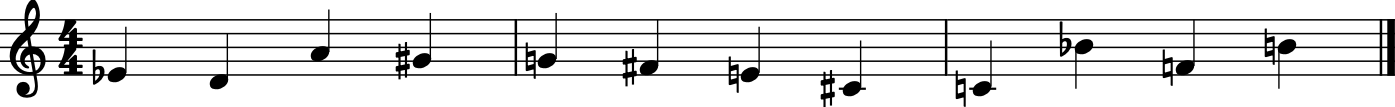

<music21.stream.Stream 0x120caeb60>

In [4]:
PCSet(row,UNI=False,ORD=False).displayNotes(xml=False)

In [5]:
# pitch - duration matrix
matrix = np.zeros((12,12),dtype=int)

In [6]:
for i in range(12):
    idx = PCSrow(row).normalOrder().I().pcs[i]
    matrix[i,:] = np.mod(PCSrow(row).normalOrder().T(idx).pcs + 3,12)

In [7]:
print(matrix) # so that 0 = Eb as in the original Boulez's construction

[[ 3  2  9  8  7  6  4  1  0 10  5 11]
 [ 4  3 10  9  8  7  5  2  1 11  6  0]
 [ 9  8  3  2  1  0 10  7  6  4 11  5]
 [10  9  4  3  2  1 11  8  7  5  0  6]
 [11 10  5  4  3  2  0  9  8  6  1  7]
 [ 0 11  6  5  4  3  1 10  9  7  2  8]
 [ 2  1  8  7  6  5  3  0 11  9  4 10]
 [ 5  4 11 10  9  8  6  3  2  0  7  1]
 [ 6  5  0 11 10  9  7  4  3  1  8  2]
 [ 8  7  2  1  0 11  9  6  5  3 10  4]
 [ 1  0  7  6  5  4  2 11 10  8  3  9]
 [ 7  6  1  0 11 10  8  5  4  2  9  3]]


In [8]:
# Duration dictionary
Ddur = {
    3: 1/32,
    2: 1/16,
    9: 3/32,
    8: 1/8,
    7: 1/8+1/32,
    6: 3/16,
    4: 3/16+1/32,
    1: 1/4,
    0: 1/4+1/32,
    10:1/4+1/16,
    5: 1/4+3/32,
    11:3/8
}

In [9]:
# Measures 1-7
# Piano I: pitch -> P0; duration -> RI4
# Piano II: pitch -> I0; duration -> R8
Piano1 = NoteSeq()
Piano2 = NoteSeq()
for i in range(12):
    Piano1.append(Note(matrix[0,i],np.random.choice(range(3))+4,Ddur[matrix[-i-1,4]]))
    Piano2.append(Note(matrix[i,0],np.random.choice(range(3))+4,Ddur[matrix[4,-i-1]]))

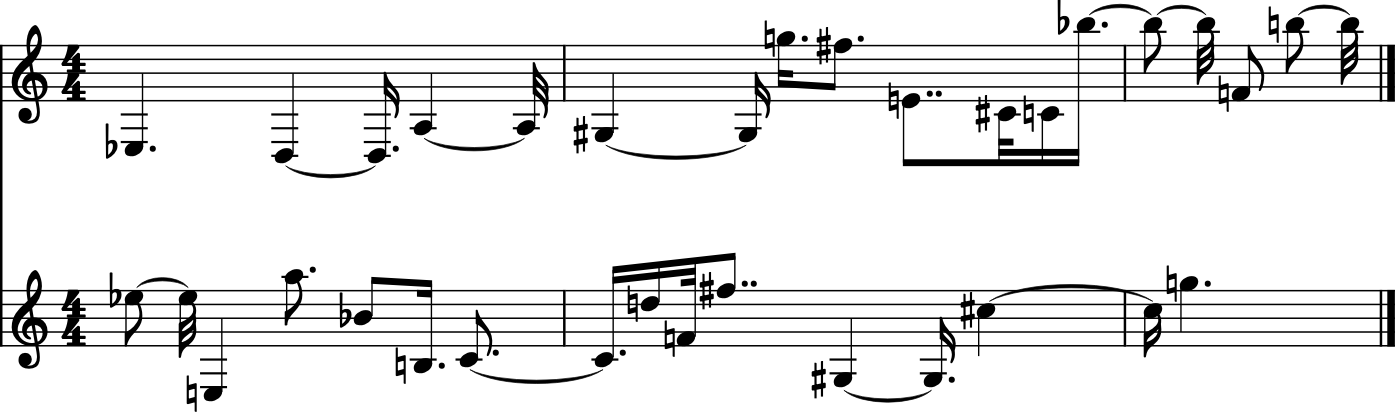

In [10]:
displayNotes([Piano1,Piano2],show='midi')